In [72]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io

from scipy import misc

from sklearn.metrics import accuracy_score

import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 

%matplotlib inline

### Login

In [73]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

client_id = '164fe11263da4ce8b39cb03311385ce6'
client_secret = '448a0146206e4b718e4bcc0865efcd29'
redirect_uri='http://localhost:8080/callback'
username = '5865b9eadfc54092'
scope = 'user-library-read playlist-read-private'


#Credentials to access the Spotify Music Data
from spotipy.oauth2 import SpotifyOAuth
import spotipy

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id,
                                               client_secret,
                                               redirect_uri,
                                               scope = 'user-library-read playlist-read-private'))

### Input Data into Model

- gathering good and bad playlists
- The method signature is sp.user_playlist('user', 'playlist_id')
- To do this go to your good and bad playlists and copy the links.
    - An example spotify link: https://open.spotify.com/user/1287242681/playlist/5OdH7PmotfAO7qDGxKdw3J
    - The user is the number after user/ and the playlist id is after the playlist/.

In [74]:
good_playlist = sp.user_playlist("1287242681", "0zgnMFEGrQdROGaTmCDcdI")
bad_playlist = sp.user_playlist("1287242681", "37i9dQZF1EIeBK96mJllYR")

# https://open.spotify.com/playlist/0zgnMFEGrQdROGaTmCDcdI?si=3c6d800197624757
# https://open.spotify.com/playlist/4xsezTLL6nTw71prwB0IWE?si=1644f32f1e57424b
# https://open.spotify.com/playlist/37i9dQZF1EIeBK96mJllYR?si=6fc5535b01db45c4

In [75]:
#Get the good song id's out of the good playlists, need it for the audio features call.
good_tracks = good_playlist["tracks"]
good_songs = good_tracks["items"] 
while good_tracks['next']:
    good_tracks = sp.next(good_tracks)
    for item in good_tracks["items"]:
        good_songs.append(item)
good_ids = [] 
print(len(good_songs))
for i in range(len(good_songs)):
    print(good_songs[i]['track']['id'])
    good_ids.append(good_songs[i]['track']['id'])
# good_tracks

1111
4irYeuAi87yyGHcI4h9s0x
7Cye3UbCA6UNuDykdCf3AB
3SCVHoGHV7GL0hmqcOIpqh
5XAPpyIoYF3QXP34Hv8Pvx
3YeQsJs1FdLI3w0BqWwpmk
6GB3N6bDucdHThFVDCBcCv
5vyR3lTiw4zz8B4PvnAO4c
7zOIzXpbnCcx6iZfvOjGCQ
1rH7UXSGDTZBYPiRW3bNI6
7xVLFuuYdAvcTfcP3IG3dS
2NeHnSFnwNp1Z5WYgcjJ8L
3kpYJjvM8Ja6btr5hEJLWc
2QKBvCMHdokPoy2b44dK2m
5FE5o6S5W69D9F9Ay1QzHs
1Y5DXtYfMbUZxkVvdTmitd
7EnGzsqQi0bAVGQw8i4WIQ
551xyaSJsg8hILXFq9JdST
7gYY7Dh2YuEKG6e2UJR18y
0oSIYJiJNBXIMVCUEhsN1q
3cLXgIlvugVKpWBmO5v9oy
3PcrNUFsSYnkJJNE6roBKl
3OEnY5jdjIZcvl4zMG5DDj
32gSPav2xqFylAeCjJCxWi
4mx0eNjjZUyOzfY3I4P9HD
7x8dCjCr0x6x2lXKujYD34
1vcxF91pWs9uNwDROuiCPB
2VGQ342iuqj6aSaYbyBQVJ
2gVuP7yxrIsn2s3i68eHjt
2QqJTIlGKRLJC3onkavYEz
6sDCgB1Ulh7aw92mk0opyd
2WWruw7ul9N7eqoHELyMc2
6PnTgx9lyvLGIcPnroCvc2
792HwhrdO3ErRKL5yRe4Ge
1xipD8uEQwFFm6vAj1w8Uq
2CmbZP4WM419v36X0svMnk
3JKgcAa7r07ocVWcV8bS0H
6jmTHeoWvBaSrwWttr8Xvu
1gyRKqGojB0xbiommbjN32
6oBL8TdQHEO7jeEdqECg37
4D2pxxPpgyJdowXmebsXKs
1Syhm4vkn6n2DYuFnyI60s
4gxpxSVkqWo8IP2rGqzVXm
6qNLO4HzHeVvHxTaCFMXrf
5QuFo1

In [76]:
#Now do the same thing for the bad playlist
bad_tracks = bad_playlist["tracks"]
bad_songs = bad_tracks["items"] 
while bad_tracks['next']:
    bad_tracks = sp.next(bad_tracks)
    for item in bad_tracks["items"]:
        bad_songs.append(item)
bad_ids = [] 
print(len(bad_songs))
for i in range(len(bad_songs)):
    bad_ids.append(bad_songs[i]['track']['id'])

50


In [77]:
print(sp.audio_features(good_ids[0]))

[{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}]


In [78]:
# remove unavailible tracks (features = NoneType)
filtered_ids = [id for id in good_ids if id is not None]
good_ids = filtered_ids

In [79]:
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    print(audio_features)

[{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}, {'danceability': 0.625, 'energy': 0.45, 'key': 9, 'loudness': -9.985, 'mode': 1, 'speechiness': 0.0311, 'acousticness': 0.0776, 'instrumentalness': 0.000217, 'liveness': 0.117, 'valence': 0.0362, 'tempo': 92.974, 'type': 'audio_features', 'id': '7Cye3UbCA6UNuDykdCf3AB', 'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB', 'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7Cye3UbCA6UNuDykdCf3AB', '

In [80]:
features = []
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        features[-1]['target'] = 1

In [81]:
features

[{'danceability': 0.849,
  'energy': 0.648,
  'key': 7,
  'loudness': -6.188,
  'mode': 1,
  'speechiness': 0.0832,
  'acousticness': 0.0725,
  'instrumentalness': 0.00592,
  'liveness': 0.0984,
  'valence': 0.196,
  'tempo': 106.075,
  'type': 'audio_features',
  'id': '4irYeuAi87yyGHcI4h9s0x',
  'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x',
  'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x',
  'duration_ms': 111020,
  'time_signature': 4,
  'target': 1},
 {'danceability': 0.625,
  'energy': 0.45,
  'key': 9,
  'loudness': -9.985,
  'mode': 1,
  'speechiness': 0.0311,
  'acousticness': 0.0776,
  'instrumentalness': 0.000217,
  'liveness': 0.117,
  'valence': 0.0362,
  'tempo': 92.974,
  'type': 'audio_features',
  'id': '7Cye3UbCA6UNuDykdCf3AB',
  'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB',
  'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB',
  'anal

In [83]:
#Here is where we get all of the audio_features for the tracks on the good and bad playlists.
features = []
inSavedTracks = []
j = 0
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    for track in audio_features:
        print(track)
        features.append(track)
        track = good_songs[j]
        j= j+1
        features[-1]['trackPopularity'] = track['track']['popularity']
        if track['track']['artists'][0]['id'] is not None:
            features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['target'] = 1
j = 0
for i in range(0,len(bad_ids),50):
    audio_features = sp.audio_features(bad_ids[i:i+50])
    for track in audio_features:
        print(track)
        features.append(track)
        track = good_songs[j]
        j= j+1
        features[-1]['trackPopularity'] = track['track']['popularity']
        if track['track']['artists'][0]['id'] is not None:
            features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['target'] = 0

{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}
{'danceability': 0.625, 'energy': 0.45, 'key': 9, 'loudness': -9.985, 'mode': 1, 'speechiness': 0.0311, 'acousticness': 0.0776, 'instrumentalness': 0.000217, 'liveness': 0.117, 'valence': 0.0362, 'tempo': 92.974, 'type': 'audio_features', 'id': '7Cye3UbCA6UNuDykdCf3AB', 'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB', 'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7Cye3UbCA6UNuDykdCf3AB', 'du

### Model Training and Data Modeling

In [ ]:
trainingData = pd.DataFrame(features)
trainingData.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,trackPopularity,artistPopularity,target
0,0.982,0.478,5,-7.658,0,0.2020,0.11800,0.740,0.1120,0.567,...,audio_features,0kiMIjBpMFgh9yuKJawjX4,spotify:track:0kiMIjBpMFgh9yuKJawjX4,https://api.spotify.com/v1/tracks/0kiMIjBpMFgh...,https://api.spotify.com/v1/audio-analysis/0kiM...,412133,4,0,46.0,1
1,0.662,0.429,4,-12.522,1,0.0437,0.04180,0.882,0.1050,0.150,...,audio_features,5WL6VbqrAs7qYsMkCvShoN,spotify:track:5WL6VbqrAs7qYsMkCvShoN,https://api.spotify.com/v1/tracks/5WL6VbqrAs7q...,https://api.spotify.com/v1/audio-analysis/5WL6...,257851,4,54,56.0,1
2,0.847,0.346,7,-11.243,1,0.0936,0.00339,0.918,0.0704,0.404,...,audio_features,2uTPHrN8zqYnHUb6Wuz1FC,spotify:track:2uTPHrN8zqYnHUb6Wuz1FC,https://api.spotify.com/v1/tracks/2uTPHrN8zqYn...,https://api.spotify.com/v1/audio-analysis/2uTP...,436150,4,56,54.0,1
3,0.899,0.407,2,-10.510,1,0.0519,0.00504,0.852,0.1110,0.244,...,audio_features,4o5fJRw7WBtHGUTiwLnARq,spotify:track:4o5fJRw7WBtHGUTiwLnARq,https://api.spotify.com/v1/tracks/4o5fJRw7WBtH...,https://api.spotify.com/v1/audio-analysis/4o5f...,399507,4,0,61.0,1
4,0.824,0.788,9,-5.924,1,0.0484,0.00593,0.706,0.2960,0.457,...,audio_features,38qAaZpFyxhPoLnsr6d7bX,spotify:track:38qAaZpFyxhPoLnsr6d7bX,https://api.spotify.com/v1/tracks/38qAaZpFyxhP...,https://api.spotify.com/v1/audio-analysis/38qA...,460266,4,37,52.0,1


In [ ]:
train, test = train_test_split(trainingData, test_size = 0.15)
print("Training size: {}, Test size: {}".format(len(train),len(test)))

Training size: 139, Test size: 25


In [ ]:
# Custom Color Palette for graphs
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [ ]:
pos_tempo = trainingData[trainingData['target'] == 1]['tempo']
neg_tempo = trainingData[trainingData['target'] == 0]['tempo']
pos_dance = trainingData[trainingData['target'] == 1]['danceability']
neg_dance = trainingData[trainingData['target'] == 0]['danceability']
pos_duration = trainingData[trainingData['target'] == 1]['duration_ms']
neg_duration = trainingData[trainingData['target'] == 0]['duration_ms']
pos_loudness = trainingData[trainingData['target'] == 1]['loudness']
neg_loudness = trainingData[trainingData['target'] == 0]['loudness']
pos_speechiness = trainingData[trainingData['target'] == 1]['speechiness']
neg_speechiness = trainingData[trainingData['target'] == 0]['speechiness']
pos_valence = trainingData[trainingData['target'] == 1]['valence']
neg_valence = trainingData[trainingData['target'] == 0]['valence']
pos_energy = trainingData[trainingData['target'] == 1]['energy']
neg_energy = trainingData[trainingData['target'] == 0]['energy']
pos_acousticness = trainingData[trainingData['target'] == 1]['acousticness']
neg_acousticness = trainingData[trainingData['target'] == 0]['acousticness']
pos_key = trainingData[trainingData['target'] == 1]['key']
neg_key = trainingData[trainingData['target'] == 0]['key']
pos_instrumentalness = trainingData[trainingData['target'] == 1]['instrumentalness']
neg_instrumentalness = trainingData[trainingData['target'] == 0]['instrumentalness']
pos_popularity = trainingData[trainingData['target'] == 1]['trackPopularity']
neg_popularity = trainingData[trainingData['target'] == 0]['trackPopularity']

In [ ]:
print(pos_tempo)


0      122.007
1      121.034
2      126.009
3      127.999
4      127.988
        ...   
109    127.010
110    134.986
111    122.995
112    118.004
113    137.959
Name: tempo, Length: 114, dtype: float64


In [ ]:
print(neg_tempo)

114    118.818
115    187.573
116    130.072
117    130.725
118    117.079
119    140.099
120    115.822
121    128.054
122    124.694
123     81.114
124    139.946
125    131.745
126    128.653
127    125.963
128    128.482
129    137.009
130     96.010
131    128.047
132    141.913
133    119.981
134    127.029
135    133.992
136    151.824
137    131.892
138    139.950
139    179.879
140    129.978
141     93.698
142    131.973
143    135.989
144    131.971
145    156.252
146    124.016
147    137.931
148    125.000
149    142.514
150    132.966
151    127.974
152    128.081
153    123.018
154    138.025
155    148.859
156    132.955
157    111.395
158    169.360
159    154.052
160    139.987
161    131.935
162    178.095
163    137.957
Name: tempo, dtype: float64


In [ ]:
print(pos_popularity)
print(neg_popularity)

0       0
1      54
2      56
3       0
4      37
       ..
109    43
110    25
111    79
112    47
113    90
Name: trackPopularity, Length: 114, dtype: int64
114     0
115    54
116    56
117     0
118    37
119    40
120     0
121     0
122     0
123     0
124     3
125    49
126    46
127     0
128    49
129     8
130    28
131     0
132     0
133     0
134     0
135     0
136    48
137    39
138     6
139     1
140     0
141     0
142    30
143     0
144     0
145     2
146    32
147     0
148    38
149    41
150     0
151     0
152     0
153     0
154     0
155    66
156    59
157     2
158     0
159     0
160     0
161     0
162    15
163    19
Name: trackPopularity, dtype: int64


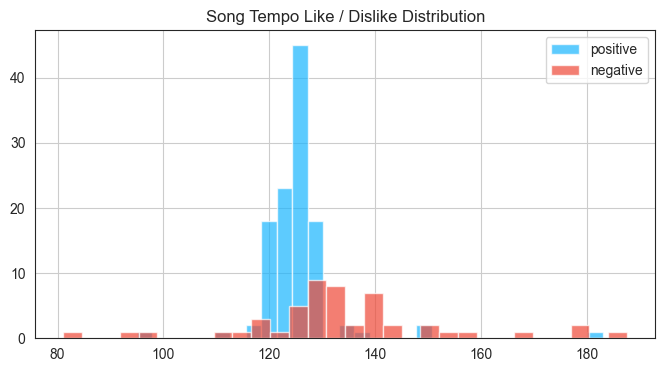

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

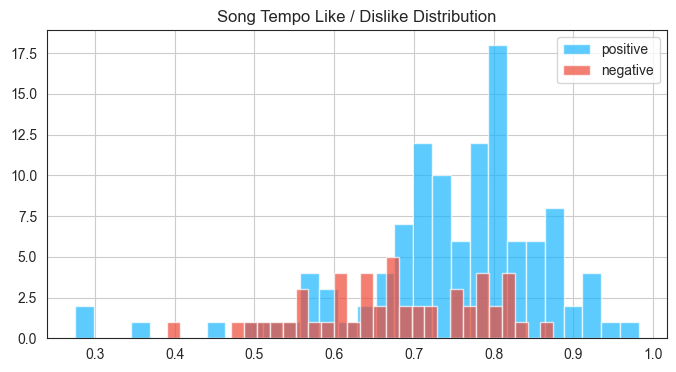

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.title("Song Tempo Like / Dislike Distribution")
pos_dance.hist(alpha=0.7, bins=30, label='positive')
neg_dance.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

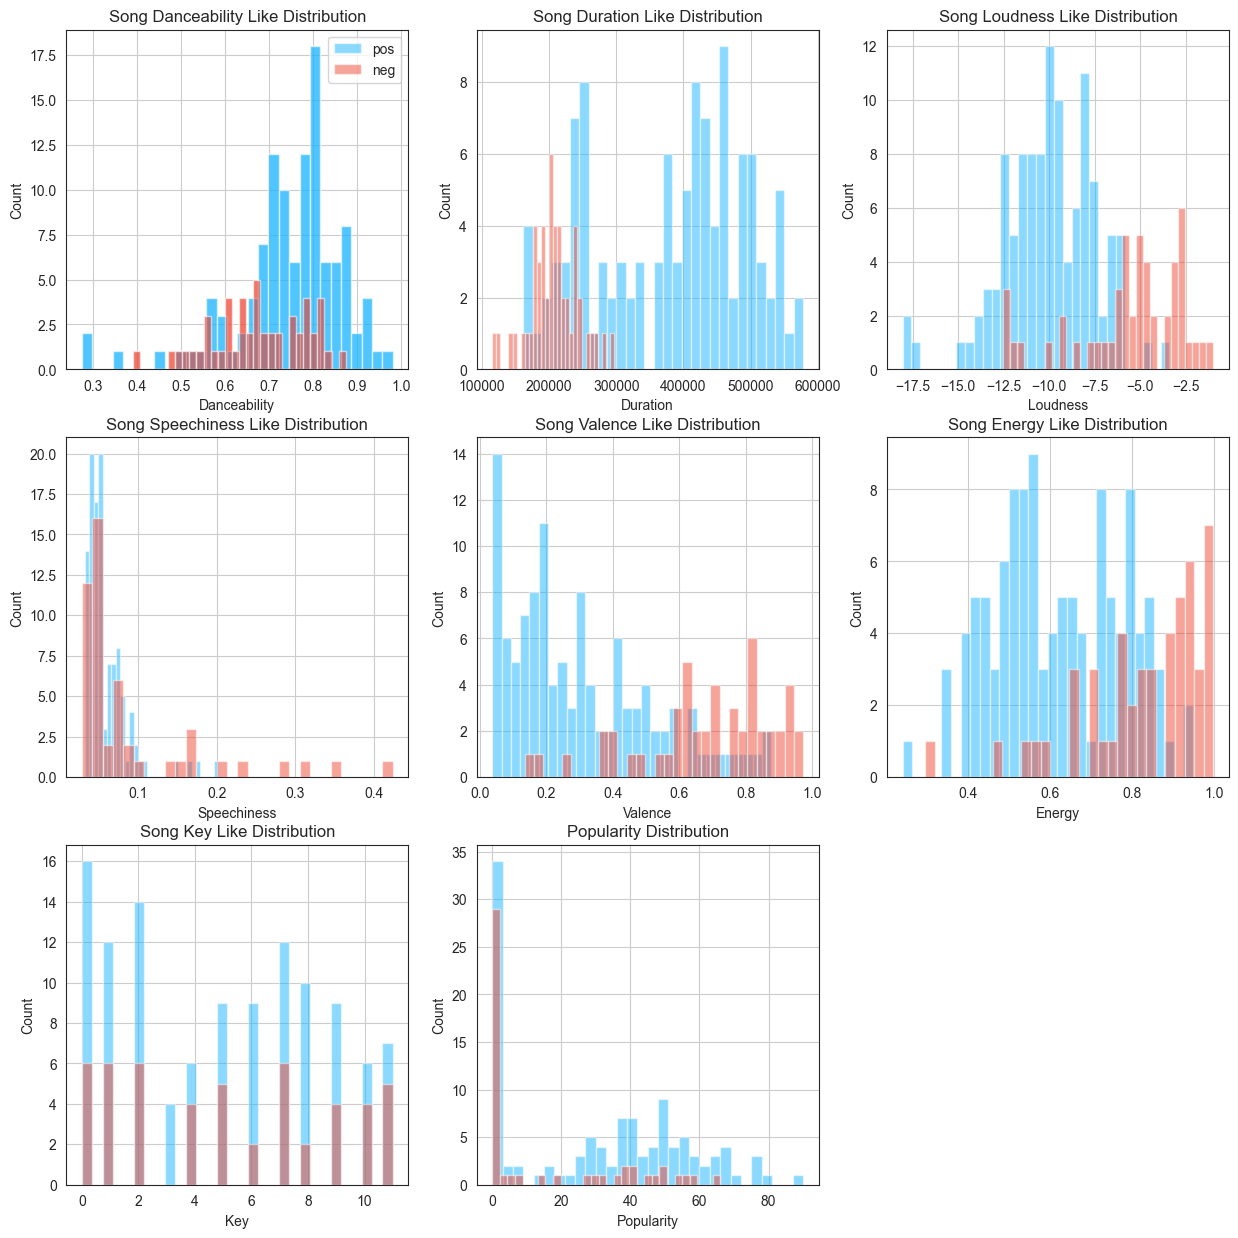

In [ ]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins=30, ax=ax3)
neg_dance.hist(alpha= 0.5, bins=30, ax=ax3)

#Duration_ms
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins=30, ax=ax5)
neg_duration.hist(alpha= 0.5, bins=30, ax=ax5)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins=30, ax=ax7)
neg_loudness.hist(alpha= 0.5, bins=30, ax=ax7)

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.5, bins=30, ax=ax9)
neg_speechiness.hist(alpha= 0.5, bins=30, ax=ax9)

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins=30, ax=ax11)
neg_valence.hist(alpha= 0.5, bins=30, ax=ax11)

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins=30, ax=ax13)
neg_energy.hist(alpha= 0.5, bins=30, ax=ax13)

#Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha= 0.5, bins=30, ax=ax15)
neg_key.hist(alpha= 0.5, bins=30, ax=ax15)

#Popularity
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Popularity')
ax17.set_ylabel('Count')
ax17.set_title('Popularity Distribution')
pos_popularity.hist(alpha= 0.5, bins=30, ax=ax17)
neg_popularity.hist(alpha= 0.5, bins=30, ax=ax17)

pos_dance.hist(alpha= 0.5, bins=30, ax=ax3, label='pos')
neg_dance.hist(alpha= 0.5, bins=30, ax=ax3, label='neg')
ax3.legend()

In [ ]:
#Define the set of features that we want to look at
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]

In [ ]:
#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [ ]:
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(x_train, y_train)

In [ ]:
def show_tree(InputTree, features, path):
    f = io.StringIO()
    tree.export_graphviz(InputTree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
# TODO install 
# show_tree(dt, features, "dec_tree.png")

In [ ]:
y_pred = c.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  100.0 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn_pred = c.predict(x_test)
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  100.0 %


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
score = accuracy_score(y_test, mlp_pred) * 100
print("Accuracy using mlp Tree: ", round(score, 1), "%")

Accuracy using mlp Tree:  76.0 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")

Accuracy using random forest:  100.0 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

c:\Users\Michael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy using ada:  100.0 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  92.0 %


In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(x_train, y_train)
predicted= k_means.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Kmeans: ", round(score, 1), "%")

Accuracy using Kmeans:  12.0 %


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using Gbc:  100.0 %


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
qda_pred = qda.predict(x_test)
score = accuracy_score(y_test, qda_pred)*100
print("Accuracy using qda: ", round(score, 1), "%")

Accuracy using qda:  100.0 %


In [ ]:
from sklearn.svm import SVC
svc_lin = SVC(kernel="linear", C=0.025)
svc_lin.fit(x_train, y_train)
svc_pred = svc_lin.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, svc_pred) * 100
print("Accuracy using svc linear: ", round(score, 1), "%")

Accuracy using svc linear:  96.0 %


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gpc.fit(x_train, y_train)
gpc_pred = gpc.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, gpc_pred) * 100
print("Accuracy using gpc: ", round(score, 1), "%")

Accuracy using gpc:  28.0 %


In [ ]:
client_id = '164fe11263da4ce8b39cb03311385ce6'
client_secret = '448a0146206e4b718e4bcc0865efcd29'
redirect_uri='http://localhost:8080/callback'
username = '5865b9eadfc54092'
scope = 'playlist-modify-private playlist-modify-public playlist-read-private user-library-read'


#Credentials to access the Spotify Music Data
from spotipy.oauth2 import SpotifyOAuth
import spotipy

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id,
                                               client_secret,
                                               redirect_uri,
                                               scope = 'user-library-read playlist-read-private'))

In [ ]:
# https://open.spotify.com/playlist/37i9dQZEVXboFaKVZ0SRxM?si=5461b1f5714646cb
playlistToFindSongsYouLikeIn = sp.user_playlist("spotify", "37i9dQZEVXboFaKVZ0SRxM")

newPlaylist_tracks = playlistToFindSongsYouLikeIn["tracks"]
newPlaylist_songs = newPlaylist_tracks["items"] 
while newPlaylist_tracks['next']:
    newPlaylist_tracks = sp.next(newPlaylist_tracks)
    for song in newPlaylist_tracks["items"]:
        newPlaylist_songs.append(song)
        
newPlaylist_song_ids = [] 
print(len(newPlaylist_songs))
for i in range(len(newPlaylist_songs)):
    newPlaylist_song_ids.append(newPlaylist_songs[i]['track']['id'])
    
newPlaylist_features = []
j = 0
for i in range(0,len(newPlaylist_song_ids),50):
    audio_features = sp.audio_features(newPlaylist_song_ids[i:i+50])
    for track in audio_features:
        track['song_title'] = newPlaylist_songs[j]['track']['name']
        track['artist'] = newPlaylist_songs[j]['track']['artists'][0]['name']
        j= j + 1
        newPlaylist_features.append(track)
print(len(newPlaylist_features))

playlistToLookAtFeatures = pd.DataFrame(newPlaylist_features)

30
30


In [ ]:
# https://open.spotify.com/playlist/7FoNW55Sdf38eY23BcQCDp?si=f6b9b38b8bd74613

pred = gbc.predict(playlistToLookAtFeatures[features])

to_add = []

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + playlistToLookAtFeatures["song_title"][i] + ", By: "+ playlistToLookAtFeatures["artist"][i] + " id : " + playlistToLookAtFeatures["id"][i])
        # print(type(playlistToLookAtFeatures["id"][i]))
        to_add.append(playlistToLookAtFeatures['id'][i])
        likedSongs = likedSongs + 1
    i = i + 1

Song: Movement, By: Marshmello id : 6cXZ5xkPNb9P5C6Z9564Cx
<class 'str'>
Song: Call my name, By: AVAION id : 1mPhj6VWS4BsLQumiXcQXG
<class 'str'>
Song: Miroir Miroir (ABGT564) - Qrion Remix, By: CRi id : 1GMKsnjhiazt8wFg5B7ufI
<class 'str'>
Song: Lost at Sea - ANNA Remix, By: Rob Grant id : 3d1sRLMVrXnCBawEZo69bR
<class 'str'>
Song: Falling, By: Camo & Krooked id : 0ySW1vdmqRwA95VvQOc0GC
<class 'str'>
Song: There Is Something Special About Boxhagener Platz, By: Oliver Koletzki id : 1GaelEndl8VDKKkb1CcHjd
<class 'str'>
Song: home., By: Beyazz id : 7Acwq0khyoAFO50WSfgc4t
<class 'str'>
Song: Do You Like Bass? (CHEX Remix), By: Yellow Claw id : 1KEkNedoHne4ejqn96pc8Z
<class 'str'>


In [ ]:
to_add

['6cXZ5xkPNb9P5C6Z9564Cx',
 '1mPhj6VWS4BsLQumiXcQXG',
 '1GMKsnjhiazt8wFg5B7ufI',
 '3d1sRLMVrXnCBawEZo69bR',
 '0ySW1vdmqRwA95VvQOc0GC',
 '1GaelEndl8VDKKkb1CcHjd',
 '7Acwq0khyoAFO50WSfgc4t',
 '1KEkNedoHne4ejqn96pc8Z']

In [ ]:
sp.user_playlist_add_tracks("5865b9eadfc54092", "7FoNW55Sdf38eY23BcQCDp", to_add)

{'snapshot_id': 'NSw0YTZmMmEwMmMyZDg0Mzc4YjEzYjE2NzlkYjdkMmI1OTQxMjM0Y2Zm'}